<a href="https://colab.research.google.com/github/Alton1998/WastePricePredictionProject/blob/main/gol_data_stuff.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/daily kraft rates - Sheet1.csv")

In [ ]:
df

/usr/local/lib/python3.10/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,Sr. No.,Date,Time,Kraft
0,1,25/05/2017,NaN,₹17.50
1,2,29/05/2017,NaN,₹17.00
2,3,02/06/2017,NaN,₹16.75
3,4,14/06/2017,NaN,₹16.50
4,5,17/02/2017,NaN,₹16.25
...,...,...,...,...
415,416,09/02/2024,11:30:00,₹17.50
416,417,11/02/2024,11:30:00,₹17.25
417,418,11/02/2024,17:30:00,₹17.00
418,419,12/02/2024,22:30:00,₹16.50


In [ ]:
df.columns

Index(['Sr. No.', 'Date', 'Time', 'Kraft'], dtype='object')

In [ ]:
important_columns = ['Date', 'Kraft']

In [ ]:
df = df[important_columns]
print(df.loc[391]["Date"])
df.drop([342,343,391],inplace=True)

12/10/1023


<ipython-input-6-f3ceaf2f35ca>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop([342,343,391],inplace=True)


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

<ipython-input-7-b9c6864122be>:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'])
<ipython-input-7-b9c6864122be>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'])


In [ ]:
df = df.drop_duplicates(subset=['Date'],keep="first")

In [ ]:
df = df.set_index('Date')

In [ ]:
df

,Kraft
Date,
2017-05-25,₹17.50
2017-05-29,₹17.00
2017-06-02,₹16.75
2017-06-14,₹16.50
2017-02-17,₹16.25
...,...
2024-02-06,₹18.00
2024-02-09,₹17.50
2024-02-11,₹17.25


In [ ]:
exchange_df = pd.read_csv("/content/DEXINUS (1).csv")
exchange_df["DATE"] = pd.to_datetime(exchange_df["DATE"])
nifty_df = pd.read_csv("/content/Nifty 50 Historical Data (1).csv")

In [ ]:
nifty_df = nifty_df[["Date","Price"]]

In [ ]:
nifty_df["Date"] = pd.to_datetime(nifty_df["Date"])
nifty_df = nifty_df.set_index("Date")

In [ ]:
nifty_df

,Price
Date,
2024-04-03,"22,434.65"
2024-04-02,"22,453.30"
2024-04-01,"22,462.00"
2024-03-28,"22,326.90"
2024-03-27,"22,123.65"
...,...
2021-01-08,"14,347.25"
2021-01-07,"14,137.35"
2021-01-06,"14,146.25"


In [ ]:
exchange_df = exchange_df.set_index("DATE")

In [ ]:
exchange_df

,DEXINUS
DATE,
2019-03-29,69.16
2019-04-01,69.18
2019-04-02,68.91
2019-04-03,68.58
2019-04-04,69.03
...,...
2024-03-25,83.42
2024-03-26,83.32
2024-03-27,83.34


In [ ]:
end_df = pd.concat([df, exchange_df,nifty_df], axis=1, join="inner")

In [ ]:
end_df["Kraft"] = end_df['Kraft'].apply(lambda x : x[1:])

In [ ]:
end_df.describe()

,Kraft,DEXINUS,Price
count,173,173,173
unique,56,147,173
top,22.00,.,"14,347.25"
freq,12,8,1


In [ ]:
end_df.info()
end_df = end_df[end_df['DEXINUS'] != "."]
end_df["Price"] = end_df["Price"].apply(lambda x: x.replace(",",""))

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 173 entries, 2021-01-08 to 2024-02-13
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Kraft    173 non-null    object
 1   DEXINUS  173 non-null    object
 2   Price    173 non-null    object
dtypes: object(3)
memory usage: 5.4+ KB


In [ ]:
end_df["Kraft"] = pd.to_numeric(end_df["Kraft"])
end_df["DEXINUS"] = pd.to_numeric(end_df["DEXINUS"])
end_df["Price"] = pd.to_numeric(end_df["Price"])

In [ ]:
end_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 165 entries, 2021-01-08 to 2024-02-13
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Kraft    165 non-null    float64
 1   DEXINUS  165 non-null    float64
 2   Price    165 non-null    float64
dtypes: float64(3)
memory usage: 5.2 KB


In [ ]:
end_df.describe()

,Kraft,DEXINUS,Price
count,165.000000,165.000000,165.000000
mean,21.211515,77.805212,17415.485455
std,3.943398,3.911144,1939.860989
min,13.750000,72.480000,14238.900000
25%,18.050000,74.320000,15814.700000
50%,22.000000,76.420000,17382.000000
75%,23.500000,82.250000,18268.400000
max,31.500000,83.350000,21929.400000


In [ ]:
end_df

,Kraft,DEXINUS,Price
2021-01-08,18.5,73.31,14347.25
2021-01-12,19.0,73.26,14563.45
2021-01-14,19.5,73.11,14595.60
2021-01-25,19.5,73.01,14238.90
2021-02-02,19.0,72.95,14647.85
...,...,...,...
2024-01-31,19.0,83.02,21725.70
2024-02-06,18.0,83.03,21929.40
2024-02-09,17.5,83.00,21782.50
2024-02-12,16.5,82.95,21616.05


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [ ]:
features_df = end_df.drop("Kraft",axis=1)

In [ ]:
target_df = end_df["Kraft"]

In [ ]:
scaler_features = MinMaxScaler()
scaler_target = MinMaxScaler()



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features_df, target_df, test_size=0.2, random_state=42)

In [ ]:
y_train

2022-04-26    23.50
2021-01-14    19.50
2022-07-05    21.00
2021-09-07    22.00
2021-07-29    21.00
              ...  
2022-03-04    28.50
2022-09-07    22.50
2021-03-26    23.50
2022-06-23    21.00
2022-08-11    21.75
Name: Kraft, Length: 132, dtype: float64

In [ ]:
y_train.shape

(132,)

In [ ]:
X_train_scaled = scaler_features.fit_transform(X_train)
y_train_scaled = scaler_target.fit_transform(y_train.values.reshape(-1,1))
X_y_train_scaled = np.concatenate([X_train_scaled,y_train_scaled], axis=1)
X_test_scaled = scaler_features.transform(X_test)
y_test_scaled = scaler_target.transform(y_test.values.reshape(-1,1))
X_y_test_scaled = np.concatenate([X_test_scaled,y_test_scaled],axis=1)

In [ ]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [ ]:
length = 10
training_generator = TimeseriesGenerator(X_y_train_scaled,y_train_scaled,length=length,batch_size=1)
validation_generator = TimeseriesGenerator(X_y_test_scaled,y_test_scaled,length=length,batch_size=1)

In [ ]:
training_generator[0]

(array([[[0.3799448 , 0.39263747, 0.54929577],
         [0.05795768, 0.04728512, 0.32394366],
         [0.62465501, 0.20838194, 0.4084507 ],
         [0.08831647, 0.41401983, 0.46478873],
         [0.16283349, 0.20408691, 0.4084507 ],
         [0.28978841, 0.34518002, 0.71830986],
         [0.97056118, 0.98206427, 0.15492958],
         [0.0101196 , 0.14567978, 0.66197183],
         [0.97056118, 0.70735458, 0.16901408],
         [0.94204232, 0.47994989, 0.26760563]]]),
 array([[0.46478873]]))

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM,Dropout

In [ ]:
# define model
length = 10
n_features = 3
model = Sequential()
model.add(LSTM(100, activation='leaky_relu', input_shape=(length, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               41600     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 41701 (162.89 KB)
Trainable params: 41701 (162.89 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop = EarlyStopping(monitor='val_loss',patience=5)

In [ ]:
model.fit_generator(training_generator,epochs=10,
                    validation_data=validation_generator)

<ipython-input-41-a726b7822a39>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(training_generator,epochs=10,


Epoch 1/10
122/122 [==============================] - 7s 25ms/step - loss: 0.0679 - val_loss: 0.0469
Epoch 2/10
122/122 [==============================] - 3s 24ms/step - loss: 0.0534 - val_loss: 0.0597
Epoch 3/10
122/122 [==============================] - 3s 21ms/step - loss: 0.0550 - val_loss: 0.0485
Epoch 4/10
122/122 [==============================] - 1s 11ms/step - loss: 0.0534 - val_loss: 0.0595
Epoch 5/10
122/122 [==============================] - 1s 9ms/step - loss: 0.0536 - val_loss: 0.0528
Epoch 6/10
122/122 [==============================] - 1s 10ms/step - loss: 0.0522 - val_loss: 0.0594
Epoch 7/10
122/122 [==============================] - 2s 17ms/step - loss: 0.0519 - val_loss: 0.0491
Epoch 8/10
122/122 [==============================] - 1s 11ms/step - loss: 0.0513 - val_loss: 0.0619
Epoch 9/10
122/122 [==============================] - 1s 9ms/step - loss: 0.0535 - val_loss: 0.0547
Epoch 10/10
122/122 [==============================] - 1s 10ms/step - loss: 0.0497 - val_loss

In [ ]:
losses = pd.DataFrame(model.history.history)

<Axes: >

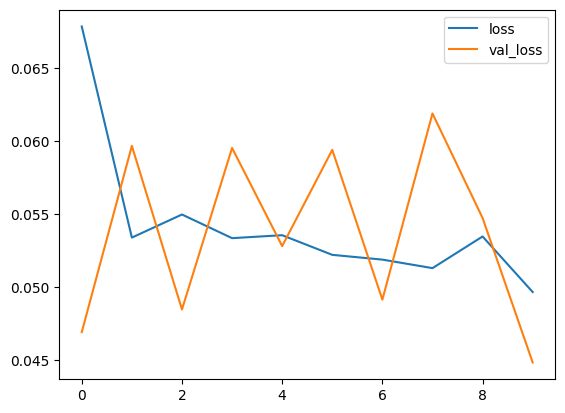

In [ ]:
losses.plot()

In [ ]:
model.save("wpp.keras")
tf.saved_model.save(model,'gol_model/')

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model = load_model("wpp.keras")

In [ ]:
y_predicted = []
y_actual = []
for i in validation_generator:
  y_actual.append(i[1])
  y_predicted.append(model.predict(i[0]))

1/1 [==============================] - 0s 22ms/step


In [ ]:
y_predicted = np.array(y_predicted)
y_actual = np.array(y_actual)

In [ ]:
y_predicted = y_predicted.reshape(-1,1)

In [ ]:
y_actual = y_actual.reshape(-1,1)

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mean_squared_error(y_actual,y_predicted)

0.04483273195276172

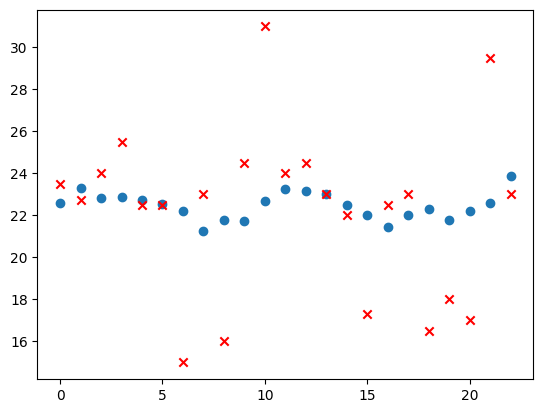

In [ ]:
plt.scatter(np.arange(23),scaler_target.inverse_transform
            (y_predicted))
plt.scatter(np.arange(23),scaler_target.inverse_transform(y_actual),marker="x", color="r")

In [ ]:
!docker pull tensorflow/serving

/bin/bash: line 1: docker: command not found


In [ ]:
!zip -r /content/gol.zip /content/gol_model/

  adding: content/gol_model/ (stored 0%)
  adding: content/gol_model/saved_model.pb (deflated 89%)
  adding: content/gol_model/assets/ (stored 0%)
  adding: content/gol_model/fingerprint.pb (stored 0%)
  adding: content/gol_model/variables/ (stored 0%)
  adding: content/gol_model/variables/variables.data-00000-of-00001 (deflated 6%)
  adding: content/gol_model/variables/variables.index (deflated 55%)


In [ ]:
tf.saved_model.save(model, 'gol_model/')

In [ ]:
validation_generator[0][0]

array([[[0.89880405, 0.72838565, 0.12676056],
        [0.91444342, 0.58378626, 0.26760563],
        [0.89236431, 0.58979797, 0.02816901],
        [0.18399264, 0.49847553, 0.57746479],
        [0.61085557, 0.25107376, 0.38028169],
        [0.05703772, 0.19869161, 0.54929577],
        [0.97516099, 0.94301129, 0.24225352],
        [0.22263109, 0.53416141, 0.50985915],
        [0.62097516, 0.41665783, 0.47887324],
        [0.96320147, 0.72052468, 0.16901408]]])